# Example Pipeline for Featurization and Machine Learning from Persistence Diagrams

Import MNIST Dataset

In [1]:
from teaspoon.ML import load_datasets
mnist = load_datasets.mnist()
mnist

,zero_dim_rtl,zero_dim_ltr,zero_dim_btt,zero_dim_ttb,one_dim_rtl,one_dim_ltr,one_dim_btt,one_dim_ttb,labels
0,"[[23.0, 50.0], [13.0, 20.0]]","[[24.0, 50.0], [11.0, 21.0]]","[[24.0, 50.0], [8.0, 9.0]]","[[23.0, 50.0]]",[],[],[],[],5
1,"[[22.0, 50.0]]","[[22.0, 50.0]]","[[23.0, 50.0]]","[[24.0, 50.0]]","[[0.0, 8.0]]","[[0.0, 8.0]]","[[0.0, 9.0]]","[[0.0, 8.0]]",0
2,"[[22.0, 50.0]]","[[25.0, 50.0]]","[[24.0, 50.0], [15.0, 16.0]]","[[23.0, 50.0], [13.0, 22.0]]",[],[],[],[],4
3,"[[21.0, 50.0]]","[[20.0, 50.0]]","[[24.0, 50.0]]","[[23.0, 50.0]]",[],[],[],[],1
4,"[[20.0, 50.0], [16.0, 18.0]]","[[22.0, 50.0], [14.0, 15.0]]","[[26.0, 50.0]]","[[21.0, 50.0]]","[[0.0, 9.0]]","[[0.0, 12.0]]","[[0.0, 9.0]]","[[0.0, 14.0]]",9
...,...,...,...,...,...,...,...,...,...
59995,"[[23.0, 50.0], [16.0, 17.0]]","[[22.0, 50.0], [16.0, 18.0]]","[[24.0, 50.0]]","[[23.0, 50.0]]","[[0.0, 13.0], [0.0, 7.0]]","[[0.0, 13.0], [0.0, 9.0]]","[[0.0, 16.0], [0.0, 6.0]]","[[0.0, 17.0], [0.0, 5.0]]",8
59996,"[[21.0, 50.0], [17.0, 18.0]]","[[24.0, 50.0], [12.0, 18.0], [9.0, 17.0]]","[[23.0, 50.0]]","[[24.0, 50.0], [7.0, 10.0]]",[],[],[],[],3
59997,"[[24.0, 50.0], [13.0, 18.0]]","[[23.0, 50.0], [12.0, 20.0]]","[[24.0, 50.0]]","[[23.0, 50.0], [5.0, 7.0]]",[],[],[],[],5
59998,"[[23.0, 50.0], [8.0, 21.0]]","[[22.0, 50.0], [11.0, 15.0]]","[[21.0, 50.0]]","[[26.0, 50.0], [8.0, 15.0]]","[[0.0, 17.0]]","[[0.0, 8.0]]","[[0.0, 15.0]]","[[0.0, 10.0]]",6


Split into training and testing dataset

In [3]:
from teaspoon.ML.PD_Classification import train_test_split_sklearn
import numpy as np
mnist_train, mnist_test = train_test_split_sklearn(mnist, labels_col='labels', train_size = .5, seed=12)

Select dimension to create features for model

In [4]:
xdgm0_train = mnist_train['zero_dim_rtl']
xdgm0_test = mnist_test['zero_dim_rtl']
labels_train = mnist_train['labels']
labels_test = mnist_test['labels']

Create features from persistence images

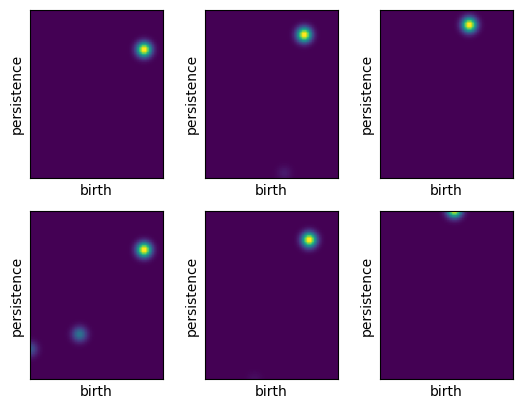

In [6]:
from teaspoon.ML.feature_functions import F_Image, plot_F_Images
PI_features = F_Image(xdgm0_train, PS=.5, var=1, pers_imager=None, training=True, parallel=True)
plot_F_Images(PI_features)

Fit features for testing set

In [7]:
PI_features_test = F_Image(xdgm0_test, PS=.5, var=1, pers_imager=PI_features['pers_imager'], training=False, parallel=True)

Fit ML Model

In [9]:
from sklearn.svm import SVC
clf = SVC(kernel="linear", C=0.025, random_state=42)
clf.fit(PI_features['F_Matrix'], labels_train)

SVC(C=0.025, kernel='linear', random_state=42)

In [10]:
train_score = clf.score(PI_features['F_Matrix'], labels_train)
test_score = clf.score(PI_features_test['F_Matrix'], labels_test)

In [14]:
print("train accuracy: ", train_score," test accuracy: ", test_score)

train accuracy:  0.3985  test accuracy:  0.3918333333333333


Use additional features to improve model accuracy, and use a larger pixel size since we will be creating features for all 8 types of persistence diagrams

In [98]:
mnist_train, mnist_test = train_test_split_sklearn(mnist, labels_col='labels', train_size = .25, seed=12)
xdgmrtl_train = mnist_train['zero_dim_rtl']
xdgmrtl_test = mnist_test['zero_dim_rtl']
xdgmltr_train = mnist_train['zero_dim_ltr']
xdgmltr_test = mnist_test['zero_dim_ltr']
xdgmbtt_train = mnist_train['zero_dim_btt']
xdgmbtt_test = mnist_test['zero_dim_btt']
xdgmttb_train = mnist_train['zero_dim_ttb']
xdgmttb_test = mnist_test['zero_dim_ttb']
labels_train = mnist_train['labels']
labels_test = mnist_test['labels']

In [69]:
labels_train[0:20]

0     3
1     5
2     7
3     5
4     6
5     0
6     3
7     4
8     6
9     0
10    9
11    4
12    2
13    1
14    8
15    7
16    4
17    5
18    5
19    8
Name: labels, dtype: uint8

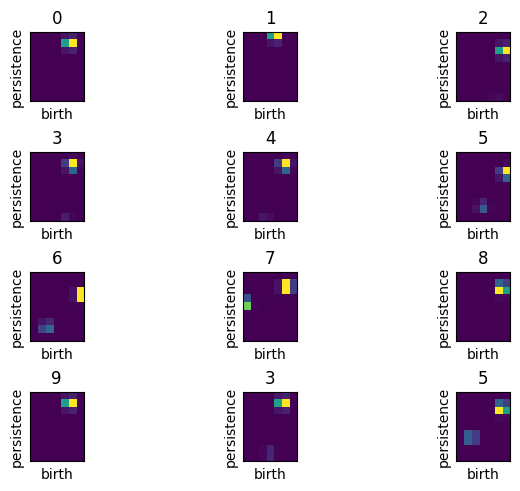

In [77]:
PI_features_rtl = F_Image(xdgmrtl_train, PS=4, var=2, pers_imager=None, training=True, parallel=True)
plot_F_Images(PI_features_rtl, num_plots=12, rows=4, cols=3, index = [5,13,12,6,7,3,8,15,14,10,0,1], labels=[0,1,2,3,4,5,6,7,8,9,3,5])

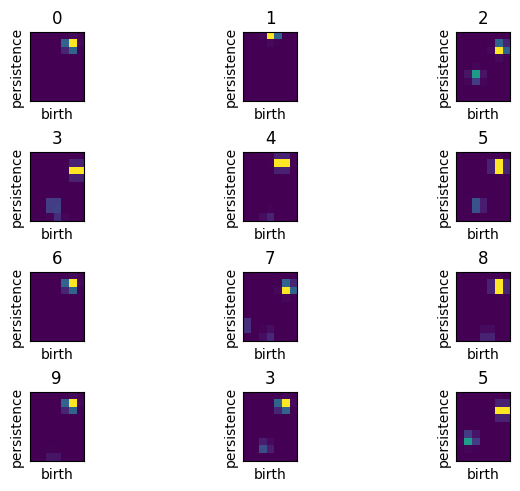

In [78]:
PI_features_ltr = F_Image(xdgmltr_train, PS=4, var=2, pers_imager=None, training=True, parallel=True)
plot_F_Images(PI_features_ltr, num_plots=12, rows=4, cols=3, index = [5,13,12,6,7,3,8,15,14,10,0,1], labels=[0,1,2,3,4,5,6,7,8,9,3,5])

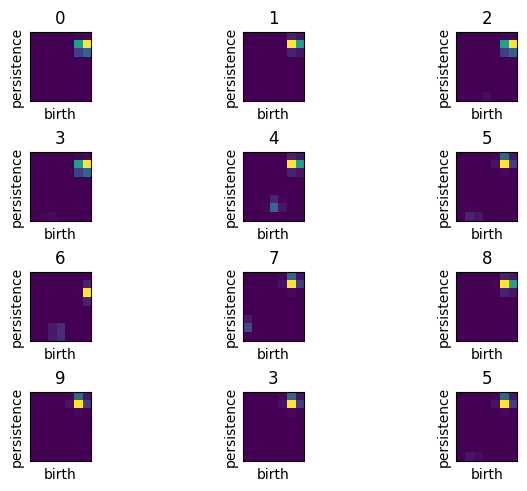

In [79]:
PI_features_ttb = F_Image(xdgmttb_train, PS=4, var=2, pers_imager=None, training=True, parallel=True)
plot_F_Images(PI_features_ttb, num_plots=12, rows=4, cols=3, index = [5,13,12,6,7,3,8,15,14,10,0,1], labels=[0,1,2,3,4,5,6,7,8,9,3,5])

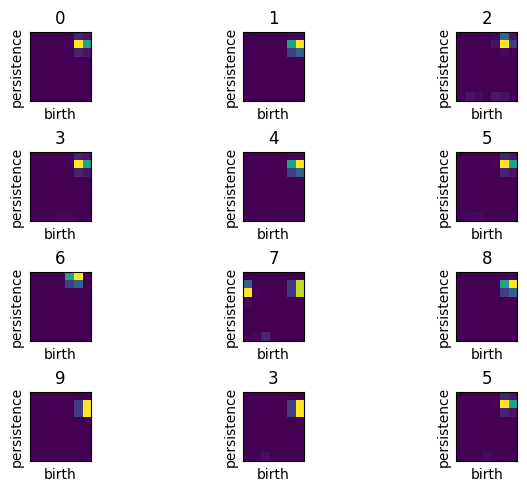

In [80]:
PI_features_btt = F_Image(xdgmbtt_train, PS=4, var=2, pers_imager=None, training=True, parallel=True)
plot_F_Images(PI_features_btt, num_plots=12, rows=4, cols=3, index = [5,13,12,6,7,3,8,15,14,10,0,1], labels=[0,1,2,3,4,5,6,7,8,9,3,5])

Train SVM Classifier on all one dimensional features

In [97]:
training = np.hstack((PI_features_ttb['F_Matrix'],PI_features_btt['F_Matrix'],PI_features_rtl['F_Matrix'],PI_features_ltr['F_Matrix']))
clf = SVC(random_state=42)
clf.fit(training, labels_train)
clf.score(training,labels_train)

0.8224

Create features for testing set using parameters from the training sets, and score on the training model

In [99]:
PI_features_rtl_test = F_Image(xdgmrtl_test, PS=4, var=2, pers_imager=PI_features_rtl['pers_imager'], training=False, parallel=True)
PI_features_ltr_test = F_Image(xdgmltr_test, PS=4, var=2, pers_imager=PI_features_ltr['pers_imager'], training=False, parallel=True)
PI_features_btt_test = F_Image(xdgmbtt_test, PS=4, var=2, pers_imager=PI_features_btt['pers_imager'], training=False, parallel=True)
PI_features_ttb_test = F_Image(xdgmttb_test, PS=4, var=2, pers_imager=PI_features_ttb['pers_imager'], training=False, parallel=True)
testing = np.hstack((PI_features_ttb_test['F_Matrix'],PI_features_btt_test['F_Matrix'],PI_features_rtl_test['F_Matrix'],PI_features_ltr_test['F_Matrix']))
clf.score(testing,labels_test)

0.8137555555555556